In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 



## Elasticity Along varying Encoder layers

In [51]:
varying_encoder_layer_model_list=['google/bert_uncased_L-2_H-768_A-12','google/bert_uncased_L-4_H-768_A-12','google/bert_uncased_L-6_H-768_A-12','google/bert_uncased_L-8_H-768_A-12','google/bert_uncased_L-10_H-768_A-12','google/bert_uncased_L-12_H-768_A-12']
varying_hidden_dim_model_list = ['google/bert_uncased_L-12_H-128_A-2','google/bert_uncased_L-12_H-256_A-4','google/bert_uncased_L-12_H-512_A-8','google/bert_uncased_L-12_H-768_A-12']


In [68]:
for model in varying_encoder_layer_model_list:
    model_name = model.split('google/')[-1]
    for trial in range(1, 11):
        data = np.loadtxt(f"../runscripts/outputs/Trial{trial}/{model_name}_time_stamp.log", delimiter=',')
        forward_times = data[:, 0]
        transfer_times = data[:, 0]
        
        fig, axs = plt.subplots(nrows=1, ncols=2)
        axs[0].plot(np.arange(0, len(data)), forward_times*1000)
        axs[0].set_title(f"TRIAL {trial}: Forward pass, GPU transfer times for {model_name}")
        axs[0].set_ylabel('Latency in ms')
        axs[0].set_xlabel('Iteration / Time step')

        axs[1].plot(np.arange(0, len(data)), transfer_times*1000)
        # axs[1].set_title(f"TRIAL {trial}: CPU->GPU times for {model_name}")
        axs[1].set_xlabel('Iteration / Time step')
        axs[1].set_ylabel('Latency in ms')
        plt.savefig(f'figures/{model_name}_TRIAL{trial}.png')
        plt.close()


In [39]:
import numpy as np

index_min = np.argmin(data_file)
index_max = np.argmax(data_file)
min_ = np.min(data_file)
max_ = np.max(data_file)

print(min_, index_min)
print(max_, index_max)

0.001565 286
0.002636 579


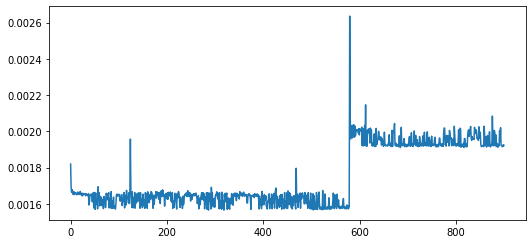

In [33]:
plt.plot(np.arange(0, len(data_file)), data_file)
plt.show()

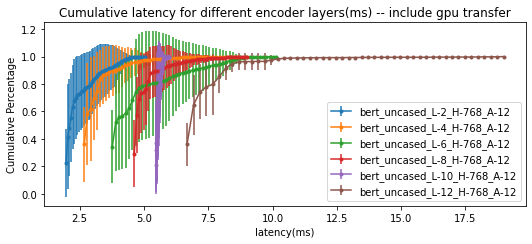

In [23]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.clf()
for i in range(len(mylist)):
    trial_data=[]
    for j in range(1, 11):
        import numpy as np
        data_file = np.loadtxt("../runscripts/outputs/Trial"+str(j)+"/"+mylist[i]+"_time_stamp.log").tolist()
        data = [x*1000 for x in data_file]
        count, bins_count = np.histogram(data, bins=50)
        pdf = count / sum(count)
        cdf = np.cumsum(pdf)
        trial_data.append(cdf)
    
    #calculate the mean and variance
    mean_plot = np.zeros(len(trial_data[0]))
    std_plot = np.zeros(len(trial_data[0]))
    for j in range(len(trial_data[0])):
        each_entry = []
        for k in range(len(trial_data)):
            each_entry.append(trial_data[k][j])
        mean_plot[j] = statistics.mean(each_entry)
        std_plot[j] = statistics.stdev(each_entry)
    
#     plt.plot(bins_count[1:], cdf, label=mylist[i])
    plt.errorbar(bins_count[1:],mean_plot,yerr=std_plot,label=mylist[i],marker='.')
plt.xlabel("latency(ms)")
plt.ylabel("Cumulative Percentage")
plt.title("Cumulative latency for different encoder layers(ms) -- include gpu transfer")
plt.legend()
plt.savefig("encoder_latency.png")
plt.show()

## Elasticity Along the varying Hidden Dimension Size

In [24]:
mylist= varying_hidden_dim_model_list
mylist = [x.split("/")[1] for x in mylist]
# data_files = [pd.read_csv(name+"_time_stamp.log",header=None)[1].tolist() for name in mylist]

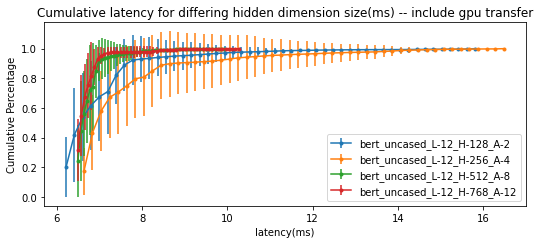

In [25]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.clf()
for i in range(len(mylist)):
    trial_data=[]
    for j in range(1,11):
        data_file = np.loadtxt("../runscripts/outputs/Trial"+str(j)+"/"+mylist[i]+"_time_stamp.log").tolist()
        data = [x*1000 for x in data_file]
        data = data[100:len(data)-100]
        count, bins_count = np.histogram(data, bins=50)
        pdf = count / sum(count)
        cdf = np.cumsum(pdf)
        trial_data.append(cdf)
    
    #calculate the mean and variance
    mean_plot = np.zeros(len(trial_data[0]))
    std_plot = np.zeros(len(trial_data[0]))
    for j in range(len(trial_data[0])):
        each_entry = []
        for k in range(len(trial_data)):
            each_entry.append(trial_data[k][j])
        mean_plot[j] = statistics.mean(each_entry)
        std_plot[j] = statistics.stdev(each_entry)
    
#     plt.plot(bins_count[1:], cdf, label=mylist[i])
    plt.errorbar(bins_count[1:],mean_plot,yerr=std_plot,label=mylist[i],marker='.')
plt.xlabel("latency(ms)")
plt.ylabel("Cumulative Percentage")
plt.title("Cumulative latency for differing hidden dimension size(ms) -- include gpu transfer")
plt.legend()
plt.savefig("hidden_dim_latency.png")
plt.show()

## Predefined miniatures latency

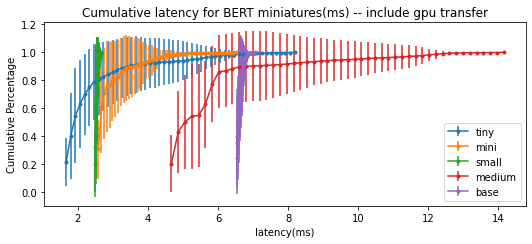

In [28]:
model_list= {"tiny" : "google/bert_uncased_L-2_H-128_A-2","mini":"google/bert_uncased_L-4_H-256_A-4", "small":"google/bert_uncased_L-4_H-512_A-8", "medium":"google/bert_uncased_L-8_H-512_A-8", "base" : "bert-base-uncased" }
# model_list= {"tiny" : "google/bert_uncased_L-4_H-256_A-4"}

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.clf()
# attention_ratio =[i/10 for i in range(1,11,1)]

for name,file in model_list.items():
    trial_data=[]
    for j in range(1,11):
        data_file = np.loadtxt("../runscripts/outputs/Trial"+str(j)+"/"+name+"_time_stamp.log").tolist()
        data = [x*1000 for x in data_file]
        data = data[100:len(data)-100]
        count, bins_count = np.histogram(data, bins=50)
        pdf = count / sum(count)
        cdf = np.cumsum(pdf)
        trial_data.append(cdf)
    
    #calculate the mean and variance
    mean_plot = np.zeros(len(trial_data[0]))
    std_plot = np.zeros(len(trial_data[0]))
    for j in range(len(trial_data[0])):
        each_entry = []
        for k in range(len(trial_data)):
            each_entry.append(trial_data[k][j])
        mean_plot[j] = statistics.mean(each_entry)
        std_plot[j] = statistics.stdev(each_entry)
    plt.errorbar(bins_count[1:],mean_plot,yerr=std_plot,label=name,marker='.')

#     data_file=pd.read_csv("./"+name+"_time_stamp.log",header=None)[1].tolist()
#     data = [x*1000 for x in data_file]
#     data = data[50:len(data)-50]
#     count, bins_count = np.histogram(data, bins=500)
#     pdf = count / sum(count)
#     cdf = np.cumsum(pdf)
#     plt.plot(bins_count[1:], cdf, label=name)
# plt.xlim(right=40)
plt.xlabel("latency(ms)")
plt.ylabel("Cumulative Percentage")
# plt.title("Cumulative latency for differing encoder layers(ms) -- include gpu transfer")
# plt.title("Cumulative latency for differing hidden dimension (ms) -- include gpu transfer")
plt.title("Cumulative latency for BERT miniatures(ms) -- include gpu transfer")

plt.legend()
plt.savefig("miniatures.png")

## Evaluation for Approach 1 Attention Elasticity

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.clf()
attention_ratio =[i/10 for i in range(1,11,1)]

for i in range(len(attention_ratio)):
#     data_file=pd.read_csv("attention_"+str(attention_ratio[i])+"_time_stamp.log",header=None)[1].tolist()
    trial_data=[]
    for j in range(1,11):
        data_file = pd.read_csv("Trial"+str(j)+"/"+"attention_"+str(attention_ratio[i])+"_time_stamp.log",header=None)[1].tolist()
        data = [x*1000 for x in data_file]
        data = data[100:len(data)-100]
        count, bins_count = np.histogram(data, bins=50)
        pdf = count / sum(count)
        cdf = np.cumsum(pdf)
        trial_data.append(cdf)
    
    #calculate the mean and variance
    mean_plot = np.zeros(len(trial_data[0]))
    std_plot = np.zeros(len(trial_data[0]))
    for j in range(len(trial_data[0])):
        each_entry = []
        for k in range(len(trial_data)):
            each_entry.append(trial_data[k][j])
        mean_plot[j] = statistics.mean(each_entry)
        std_plot[j] = statistics.stdev(each_entry)
    plt.errorbar(bins_count[1:],mean_plot,yerr=std_plot,label=str(attention_ratio[i]),marker='.')

plt.xlabel("latency(ms)")
plt.ylabel("Cumulative Percentage")
# plt.title("Cumulative latency for differing encoder layers(ms) -- include gpu transfer")
# plt.title("Cumulative latency for differing hidden dimension (ms) -- include gpu transfer")
plt.title("Cumulative latency for elastic attention Approach 1 (ms) -- include gpu transfer")

plt.legend()
plt.savefig("attention_latency1.png")

# plt.savefig("hidden_dimension_latency.png")

# plt.savefig("encoder_latency.png")
plt.show()

## Evaluation for Approach 2 Attention Elasticity

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.clf()
attention_ratio =[i/10 for i in range(1,11,1)]

for i in range(len(attention_ratio)):
#     data_file=pd.read_csv("attention_"+str(attention_ratio[i])+"_time_stamp.log",header=None)[1].tolist()
    trial_data=[]
    for j in range(1,11):
        data_file = pd.read_csv("Trial"+str(j)+"/"+"attention_2_"+str(attention_ratio[i])+"_time_stamp.log",header=None)[1].tolist()
        data = [x*1000 for x in data_file]
        data = data[100:len(data)-100]
        count, bins_count = np.histogram(data, bins=50)
        pdf = count / sum(count)
        cdf = np.cumsum(pdf)
        trial_data.append(cdf)
    
    #calculate the mean and variance
    mean_plot = np.zeros(len(trial_data[0]))
    std_plot = np.zeros(len(trial_data[0]))
    for j in range(len(trial_data[0])):
        each_entry = []
        for k in range(len(trial_data)):
            each_entry.append(trial_data[k][j])
        mean_plot[j] = statistics.mean(each_entry)
        std_plot[j] = statistics.stdev(each_entry)
    plt.errorbar(bins_count[1:],mean_plot,yerr=std_plot,label=str(attention_ratio[i]),marker='.')

plt.xlabel("latency(ms)")
plt.ylabel("Cumulative Percentage")
# plt.title("Cumulative latency for differing encoder layers(ms) -- include gpu transfer")
# plt.title("Cumulative latency for differing hidden dimension (ms) -- include gpu transfer")
plt.title("Cumulative latency for elastic attention Approach 2 (ms) -- include gpu transfer")

plt.legend()
plt.savefig("attention_latency1.png")

# plt.savefig("hidden_dimension_latency.png")

# plt.savefig("encoder_latency.png")
plt.show()